In [221]:
import pandas as pd
import os

In [222]:
os.chdir(r'C:\Users\YOGA\Documents\Python Projects\GURUKOOL')
os.getcwd()

'C:\\Users\\YOGA\\Documents\\Python Projects\\GURUKOOL'

# Task 1

In [224]:
df=pd.read_csv(r'Gurukool.csv')
df

C:\Users\YOGA\AppData\Local\Temp\ipykernel_3224\1229357816.py:1: DtypeWarning: Columns (36,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'Gurukool.csv')


,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,6595ef62849de2bb564ed9fb,6592ef86270572b0ca26a3e3,completed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,43361,Chat,gurucool,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,user
28023,6595f1f3849de2bb564edd7e,6592ef86270572b0ca26a3e3,NaN,65054784f5f203225bfcdcd1,Tarot Rupanshi,74,43361,Call,app,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN
28024,6595f23d849de2bb564ee1c9,6592ef86270572b0ca26a3e3,NaN,65054786f5f203225bfcdd0d,Astro Sanjeev,95,43361,Call,app,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN
28025,6595f384883c1bbae79c58e3,6595f36c883c1bbae79c57c9,failed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,44005,Chat,gurucool,no-refund,...,NaN,False,NaN,NaN,first,NaN,Production,NaN,NaN,NaN


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         28027 non-null  object 
 1   user                        28027 non-null  object 
 2   chatStatus                  19515 non-null  object 
 3   guru                        28027 non-null  object 
 4   guruName                    28027 non-null  object 
 5   gid                         28027 non-null  int64  
 6   uid                         28027 non-null  int64  
 7   consultationType            28027 non-null  object 
 8   website                     28027 non-null  object 
 9   refundStatus                28027 non-null  object 
 10  isWhiteListUser             28027 non-null  bool   
 11  chatSeconds                 19514 non-null  float64
 12  queue                       28027 non-null  bool   
 13  freeCall                    280

### Observations Before Data Cleaning

#### 1. **Chats**
   - Chats are conducted through the app and GuruCool (with more frequency on GuruCool).
   - Whenever a chat occurs, both start and end timings are provided, but the duration is specified for both chat and call, representing the time spent on the chat.
   - **Free vs Paid Chats:**
     - **Free chats** are always 300 seconds long.
     - **Paid chats** can vary in length.
   - **Reliability of Data:**
     - Chat seconds (`chatSeconds`) and call duration are correlated, but the call duration is more reliable when the chat is paid.
   - **Data Issues:**
     - There are **missing values** in the call duration, which can be handled using `chatSeconds`.
     - There are **negative values** in the call duration, which can be corrected by applying the `abs()` function.
     - **Paid Chats:**
       - Only **4090 paid chats** out of over **16,000** have associated amounts (matching the astrologer's earnings). These paid chats should be prioritized for analysis.

#### 2. **Calls**
   - Calls are made through the app (with more frequency) and GuruCool.
   - The **Call Channel** is the primary mode of communication.
   - The company is only charged for **paid calls**.
   - **Time Duration:**
     - The time duration in minutes corresponds with the astrologer's call time (in seconds) but only for **paid calls**.
     - Missing values in the astrologer's call time can be handled using the time duration data.
   - **Time Difference:**
     - There is a small time difference between user and astrologer call times, which can be used to infer dial time.

#### 3. **Timestamps**
   - The timestamps for **createdAt**, **chatStartTime**, **chatEndTime**, and **updatedAt** are in a sequential order.

#### 4. **Free Chats and Calls**
   - **Free chats and calls** do not result in the company charging users, and no payment is made to the astrologers.

#### 5. **Net Amount**
   - The **Net Amount** is the same as the **Amount**, which represents the charge for the conversation.

#### 6. **Most Common Mode of Communication**
   - The most common modes of communication are **chat** and **call**.

#### 7. **Refund Status**
   - The **Refund Status** can have the following values:
     - **Approved**
     - **No-refunded**
     - **Processing**
     - **Rejecting**
        

# Handling missing values, data cleaning, feature engineering.

There are rows in timeDuration which are negavtive.

In [229]:
df['timeDuration']=df['timeDuration'].abs()
df['timeDuration'].loc[df['timeDuration']<0].count

<bound method Series.count of Series([], Name: timeDuration, dtype: float64)>

In [230]:
df[['consultationType','freeCall','chatSeconds','timeDuration']].loc[df['consultationType']=='Chat'].loc[df['freeChat']==0].loc[df['timeDuration']<0]

,consultationType,freeCall,chatSeconds,timeDuration


In [231]:
df.loc[
    (df['consultationType'] == 'Chat') & 
    (df['freeChat'] == 0) & 
    (df['timeDuration'].isnull()), 
    'timeDuration'
] = chat_mean
df.loc[
    (df['consultationType'] == 'Chat') & 
    (df['freeChat'] == 0) & 
    (df['timeDuration'].isnull()), 
    'timeDuration'
].count()
# no more null values for paid chats

0

Handeling values for call

In [233]:
df[['consultationType','freeCall','timeDuration','astrologerOnCallDuration']].loc[df['consultationType']=='Call'].loc[df['freeCall']==0].loc[df['timeDuration'].isnull()].count()
# there is no missing value in timeduration for calls

consultationType            0
freeCall                    0
timeDuration                0
astrologerOnCallDuration    0
dtype: int64

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28027 entries, 0 to 28026
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         28027 non-null  object 
 1   user                        28027 non-null  object 
 2   chatStatus                  19515 non-null  object 
 3   guru                        28027 non-null  object 
 4   guruName                    28027 non-null  object 
 5   gid                         28027 non-null  int64  
 6   uid                         28027 non-null  int64  
 7   consultationType            28027 non-null  object 
 8   website                     28027 non-null  object 
 9   refundStatus                28027 non-null  object 
 10  isWhiteListUser             28027 non-null  bool   
 11  chatSeconds                 19514 non-null  float64
 12  queue                       28027 non-null  bool   
 13  freeCall                    280

To find the dialing time we need to find the dialing time.

In [411]:
df['Dial_time']=df['astrologerOnCallDuration']-df['userOnCallDuration']
df['Dial_time']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28022    NaN
28023    0.0
28024    9.0
28025    NaN
28026    NaN
Name: Dial_time, Length: 28027, dtype: float64

In [482]:
# Make a df1 where we could do time seriese analysis if needed, so we'd change the columns in dattime and timedelta.
df1=df
# Convert specified columns to datetime format
df1[['chatStartTime', 'chatEndTime', 'createdAt', 'updatedAt']] = df1[['chatStartTime', 'chatEndTime', 'createdAt', 'updatedAt']].apply(pd.to_datetime)
df1[['chatStartTime', 'chatEndTime', 'createdAt', 'updatedAt']]

,chatStartTime,chatEndTime,createdAt,updatedAt
0,2023-12-01 00:07:33.248000+00:00,2023-12-01 00:07:33.773000+00:00,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.833000+00:00
1,2023-12-01 00:09:55.808000+00:00,2023-12-01 00:09:56.052000+00:00,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:56.111000+00:00
2,2023-12-01 00:22:04.072000+00:00,2023-12-01 00:22:04.325000+00:00,2023-12-01 00:17:22.270000+00:00,2023-12-01 00:22:04.382000+00:00
3,2023-12-01 00:29:43.556000+00:00,2023-12-01 00:29:43.960000+00:00,2023-12-01 00:24:41.672000+00:00,2023-12-01 00:29:44.022000+00:00
4,NaT,NaT,2023-12-01 00:48:53.744000+00:00,2023-12-01 00:50:33.153000+00:00
...,...,...,...,...
28022,2024-01-03 23:36:10.118000+00:00,2024-01-03 23:37:57.259000+00:00,2024-01-03 23:36:02.872000+00:00,2024-01-03 23:37:57.348000+00:00
28023,NaT,NaT,2024-01-03 23:46:59.765000+00:00,2024-01-03 23:47:50.319000+00:00
28024,NaT,NaT,2024-01-03 23:48:13.271000+00:00,2024-01-03 23:48:37.907000+00:00
28025,NaT,NaT,2024-01-03 23:53:40.997000+00:00,2024-01-03 23:54:16.451000+00:00


In [479]:
df1['Update_time']=df1['updatedAt']-df1['createdAt']
df1

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy,Dial_time,Update_time
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:03:30.840000
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:04.208000
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:42.112000
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:05:02.350000
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:39.409000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,6595ef62849de2bb564ed9fb,6592ef86270572b0ca26a3e3,completed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,43361,Chat,gurucool,no-refund,...,NaN,NaN,normal,NaN,Test,NaN,NaN,user,NaN,0 days 00:01:54.476000
28023,6595f1f3849de2bb564edd7e,6592ef86270572b0ca26a3e3,NaN,65054784f5f203225bfcdcd1,Tarot Rupanshi,74,43361,Call,app,no-refund,...,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN,0.0,0 days 00:00:50.554000
28024,6595f23d849de2bb564ee1c9,6592ef86270572b0ca26a3e3,NaN,65054786f5f203225bfcdd0d,Astro Sanjeev,95,43361,Call,app,no-refund,...,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN,9.0,0 days 00:00:24.636000
28025,6595f384883c1bbae79c58e3,6595f36c883c1bbae79c57c9,failed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,44005,Chat,gurucool,no-refund,...,NaN,NaN,first,NaN,Production,NaN,NaN,NaN,NaN,0 days 00:00:35.454000


# Question 3:

1. Amount and reliable talktime information are only given for paid converations.
2. the correlation wheen talktime or callDuration is good.
3. 
4. It could we seen that Astrologers were only paid for paid sessions.
5. Netamount and amount are essiencially holds same value.

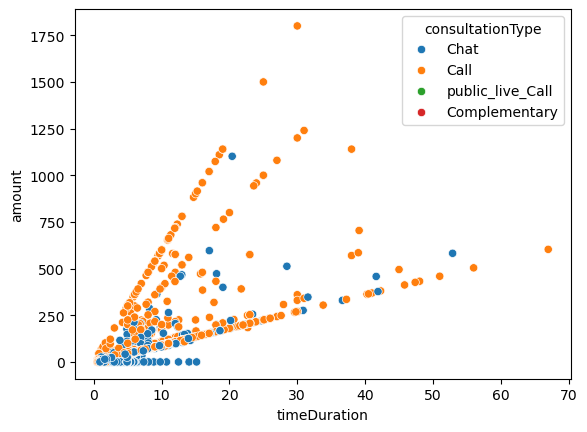

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='timeDuration', y='amount', hue='consultationType')
plt.show()
plt.xlabel('Time Duration')
plt.ylabel('Amount')
plt.title('Relation between Amount and Time Duration')
print(f'The correlation {df['timeDuration'].corr(df.amount)} is good.')

In [259]:
print(f'The correlation {df['timeDuration'].corr(df.amount)} is good.')

The correlation 0.6522799350152176 is good.


# Question 4:
Visualize the distribution of call charges using a histogram

In [289]:
df['netAmount'].value_counts(

netAmount
0.000000      6978
15.000000      148
99.000000      115
25.000000       80
45.000000       50
              ... 
269.166667       1
41.580000        1
29.850000        1
7.050000         1
14.550000        1
Name: count, Length: 935, dtype: int64

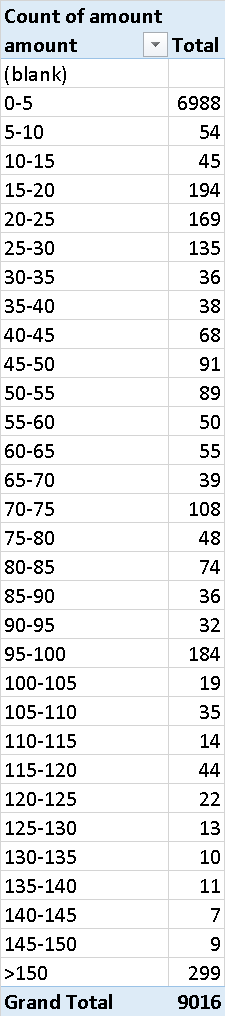!  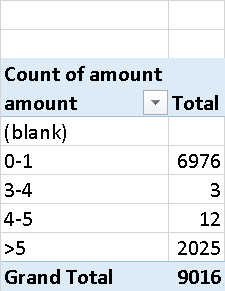!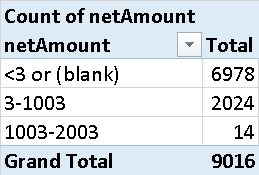!	9016
 
9016




most of the values are in the low-150	9
>150	299
Grand Total	9016
r bins hence we will have to createuneven bins in order to create a beautiful visual. order to create a beautiful visual.

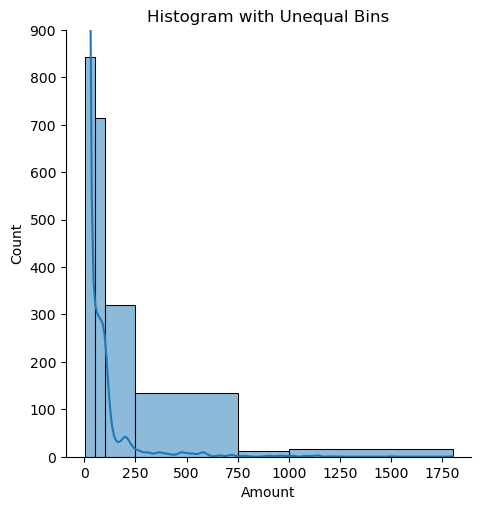

In [329]:
# Custom bin edges3,53,103,203,703, 2003
bins = [1,50,100,250,750, 1000, df['amount'].max()]  

# Plot the histogram
sns.displot(df['amount'], bins=bins, kde=True)
plt.ylim(0, 900)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Histogram with Unequal Bins')
plt.show()

Observations:
1. The data is left-sckewed.
2. The maxium values are between 1-100 and then it is 100-250.
3. Then frequecy of data between 250-750 is also great.

# Task 1

# Question:
5. Calculate the average TalkTime for different call activities (Activity column)
   - in the data there is no feild called activity, so we are considering callStatus column(reason to not choose
     astrologerCallStatus is it could be associated with the astrologer alone and not with the lead.)

In [344]:
dff=df.loc[df['consultationType'] == 'Call'].groupby('callStatus').size().reset_index(name='Counts')
dff

,callStatus,Counts
0,busy,1270
1,completed,3450
2,failed,1185
3,incomplete,875
4,no-answer,1728


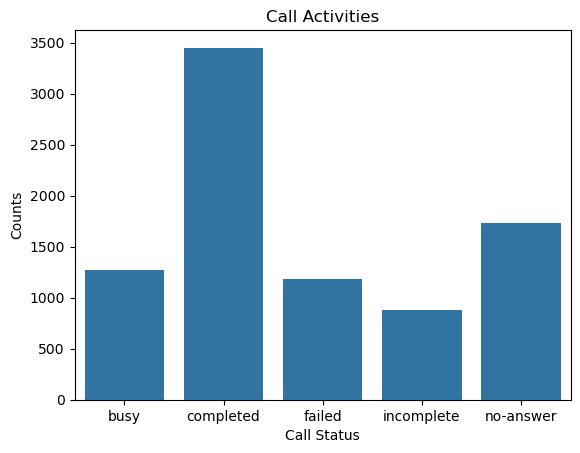

In [348]:
sns.barplot(data=dff, x='callStatus',y='Counts')
plt.xlabel('Call Status')
plt.title('Call Activities')
plt.show()

# Question: 
6.Determine the most common source of calls (Source column).

In [374]:
dff=df.loc[df['consultationType'] == 'Call'].groupby('source').size().reset_index(name='Counts')
dff.max()

source    Test
Counts    3631
dtype: object

# Question: 
7. Calculate the total earnings and spending for both users and masters.

In [393]:
df[['netAmount', 'astrologersEarnings']].loc[(df['astrologersEarnings'].notnull()) & (df['netAmount'].notnull())].sum()

netAmount              213987.315333
astrologersEarnings     99146.570950
dtype: float64

# Question:
8. Analyze the relationship between TalkTime and Charge.

1. Talktime or timeDuration(in minutes) corresponds to chatSeconds and AstrologeroncallDuration(in sec) when it is a chat or calls are paid.
2. Below is the scatter plot between timeduration and amount as orignally asked.
3. Seemingly the amount was only changed when it was a paid call or chat. 
4. Netamount and amount are essiencially holds same value.

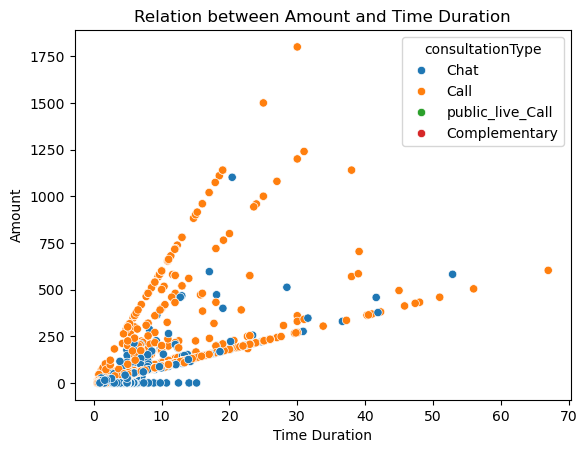

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='timeDuration', y='amount', hue='consultationType')
plt.xlabel('Time Duration')
plt.ylabel('Amount')
plt.title('Relation between Amount and Time Duration')
plt.show()

In [400]:
print(f'The correlation {df['timeDuration'].corr(df.amount)} is good.')

The correlation 0.6522799350152176 is good.


# Task 3:

# Question: 
9. Calculate the average time it takes for calls to be connected (ConnectTime - DialTime).

df.columns

In [417]:
df['Dial_time'].loc[df['Dial_time']>0].mean()

14.855190771960958

0 does not add meaningful value to your analysis (for example, when it represents missing data, a default value, or no event), it shouldn't be counted when calculating an average. Including 0 in the average might artificially reduce the overall value, especially if it's used to represent an absence rather than a valid data point.

# Question: 
10. Identify the most common reason for call disconnection (UnconnectTime - ConnectTime).

According to some sources, the following could be the scenarios when call statuses are chosen:

1. **Failed**: User was not reachable.
2. **No-response**: User didn't respond.
3. **Busy**: User answered but couldn't continue perhaps asked to rescheduled. 
4. **Canceled**: Although the session was cancelled by some sort of communication.
6. **Completed**: User answered and completed the entire call.

In the above scenarios, **Canceled** and **Busy** works best for us, because here the calls where picked but not completed, it is logical to work on these two options.

There are actually no reasons lists for these 2 scenario so we gonna do a frequency analysis for these two types, Cancel and Busy.

In [457]:
df['userCallStatus'].loc[df['userCallStatus'].isin(['canceled','busy'])].value_counts()

userCallStatus
canceled    992
busy        439
Name: count, dtype: int64

almost of the double of disconnections were done doing cancelations.

# Question: 
11. Analyze the HangUpTime patterns and identify any trends.
* we'd again use the same conditions of **Canceled** and **Busy**.
* we could find out for how much time could Astrologer have taken once they created a call and updated on it's outcoming in the system.

In [630]:
# Below mentioned columns are in the same sequence, they are performed one ater the other, in the Question 2 we found out the 
df1[['createdAt','chatStartTime', 'chatEndTime', 'updatedAt']]

,createdAt,chatStartTime,chatEndTime,updatedAt
0,2023-12-01 00:04:02.993000+00:00,2023-12-01 00:07:33.248000+00:00,2023-12-01 00:07:33.773000+00:00,2023-12-01 00:07:33.833000+00:00
1,2023-12-01 00:08:51.903000+00:00,2023-12-01 00:09:55.808000+00:00,2023-12-01 00:09:56.052000+00:00,2023-12-01 00:09:56.111000+00:00
2,2023-12-01 00:17:22.270000+00:00,2023-12-01 00:22:04.072000+00:00,2023-12-01 00:22:04.325000+00:00,2023-12-01 00:22:04.382000+00:00
3,2023-12-01 00:24:41.672000+00:00,2023-12-01 00:29:43.556000+00:00,2023-12-01 00:29:43.960000+00:00,2023-12-01 00:29:44.022000+00:00
4,2023-12-01 00:48:53.744000+00:00,NaT,NaT,2023-12-01 00:50:33.153000+00:00
...,...,...,...,...
28022,2024-01-03 23:36:02.872000+00:00,2024-01-03 23:36:10.118000+00:00,2024-01-03 23:37:57.259000+00:00,2024-01-03 23:37:57.348000+00:00
28023,2024-01-03 23:46:59.765000+00:00,NaT,NaT,2024-01-03 23:47:50.319000+00:00
28024,2024-01-03 23:48:13.271000+00:00,NaT,NaT,2024-01-03 23:48:37.907000+00:00
28025,2024-01-03 23:53:40.997000+00:00,NaT,NaT,2024-01-03 23:54:16.451000+00:00


In [632]:
dff=df1[['createdAt']]
dff['Date']=dff['createdAt'].dt.date
dff['Update_duration']=df1['Update_time']
dff['userCallStatus']=df['userCallStatus']
dff['Update_duration_seconds'] = dff['Update_duration'].dt.total_seconds()
dff['Call_status']=df1['callStatus']
dff['Update_duration_seconds']
dff['gid']=df1['gid']
dff= dff[['Date', 'gid', 'createdAt', 'Update_duration', 'userCallStatus','Update_duration_seconds', 'Call_status']]
dff

C:\Users\YOGA\AppData\Local\Temp\ipykernel_3224\2030707006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date']=dff['createdAt'].dt.date
C:\Users\YOGA\AppData\Local\Temp\ipykernel_3224\2030707006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Update_duration']=df1['Update_time']
C:\Users\YOGA\AppData\Local\Temp\ipykernel_3224\2030707006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Date,gid,createdAt,Update_duration,userCallStatus,Update_duration_seconds,Call_status
0,2023-12-01,95,2023-12-01 00:04:02.993000+00:00,0 days 00:03:30.840000,NaN,210.840,NaN
1,2023-12-01,95,2023-12-01 00:08:51.903000+00:00,0 days 00:01:04.208000,NaN,64.208,NaN
2,2023-12-01,95,2023-12-01 00:17:22.270000+00:00,0 days 00:04:42.112000,NaN,282.112,NaN
3,2023-12-01,95,2023-12-01 00:24:41.672000+00:00,0 days 00:05:02.350000,NaN,302.350,NaN
4,2023-12-01,95,2023-12-01 00:48:53.744000+00:00,0 days 00:01:39.409000,NaN,99.409,NaN
...,...,...,...,...,...,...,...
28022,2024-01-03,227,2024-01-03 23:36:02.872000+00:00,0 days 00:01:54.476000,completed,114.476,NaN
28023,2024-01-03,74,2024-01-03 23:46:59.765000+00:00,0 days 00:00:50.554000,NaN,50.554,failed
28024,2024-01-03,95,2024-01-03 23:48:13.271000+00:00,0 days 00:00:24.636000,canceled,24.636,failed
28025,2024-01-03,227,2024-01-03 23:53:40.997000+00:00,0 days 00:00:35.454000,NaN,35.454,NaN


In [640]:
condition=df['userCallStatus'].isin(['canceled','busy']) # to find only the unconnected calls
dff1=dff[condition]
dff1

,Date,gid,createdAt,Update_duration,userCallStatus,Update_duration_seconds,Call_status
21,2023-12-01,256,2023-12-01 02:27:22.081000+00:00,0 days 00:00:43.796000,busy,43.796,busy
22,2023-12-01,256,2023-12-01 02:28:32.139000+00:00,0 days 00:00:33.843000,busy,33.843,busy
23,2023-12-01,256,2023-12-01 02:30:08.498000+00:00,0 days 00:00:43.971000,busy,43.971,busy
149,2023-12-01,195,2023-12-01 05:15:49.435000+00:00,0 days 00:00:42.339000,canceled,42.339,failed
199,2023-12-01,195,2023-12-01 05:52:28.250000+00:00,0 days 00:00:41.594000,canceled,41.594,failed
...,...,...,...,...,...,...,...
27955,2024-01-03,316,2024-01-03 20:11:33.669000+00:00,0 days 00:00:10.176000,canceled,10.176,NaN
27976,2024-01-03,227,2024-01-03 20:40:24.327000+00:00,0 days 00:00:20.347000,canceled,20.347,failed
27984,2024-01-03,272,2024-01-03 20:51:36.937000+00:00,0 days 00:00:21.912000,canceled,21.912,NaN
27991,2024-01-03,272,2024-01-03 21:28:43.680000+00:00,0 days 00:00:21.589000,canceled,21.589,NaN


In [726]:
dff2=dff1.groupby('Date')[['Update_duration_seconds']].agg(Mean=('Update_duration_seconds', 'mean'),Sum=('Update_duration_seconds', 'sum')).reset_index()
dff2['Mean_in_minutes']=dff2['Mean']/60
dff2['Sum_in_minutes']=dff2['Sum']/60
dff_days=dff2[['Date','Mean_in_minutes','Sum_in_minutes']]
dff_days

,Date,Mean_in_minutes,Sum_in_minutes
0,2023-12-01,0.638972,14.696367
1,2023-12-02,0.498764,16.957983
2,2023-12-03,0.541197,40.589750
3,2023-12-04,0.567548,28.944967
4,2023-12-05,0.588783,8.831750
5,2023-12-06,0.495829,8.924917
6,2023-12-07,0.576972,23.078900
7,2023-12-08,0.621006,4.968050
8,2023-12-09,0.633427,24.070217
9,2023-12-10,0.609434,59.115117


it seems, we have data of one month starting from **'01-Dec-2023'** to **'01-Jan-2024'**. We have how much wait on an avg a Astrologer had to do and in total how many the employees had to wait in this time period.

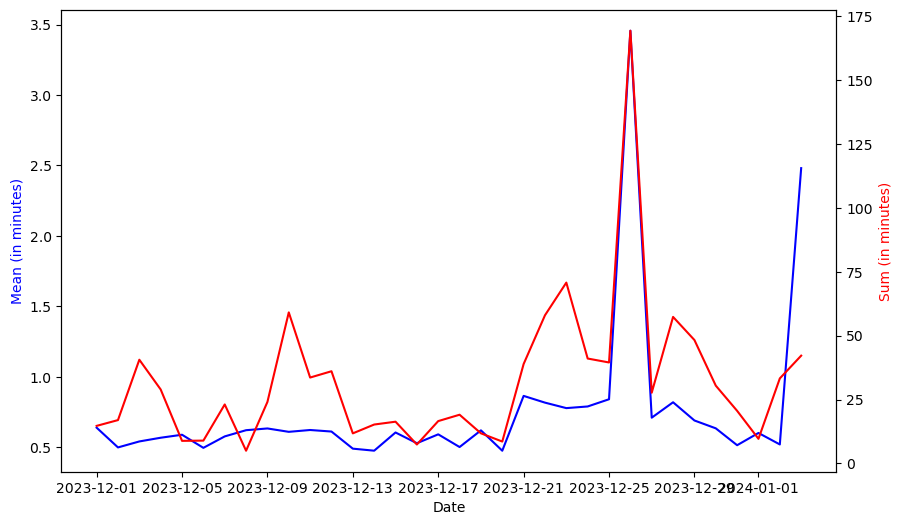

In [728]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# First line plot (Mean_in_minutes)
sns.lineplot(data=dff_days, x='Date', y='Mean_in_minutes', ax=ax1, color='b')
ax1.set_ylabel('Mean (in minutes)', color='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Second line plot (Sum_in_minutes)
sns.lineplot(data=dff_days, x='Date', y='Sum_in_minutes', ax=ax2, color='r')
ax2.set_ylabel('Sum (in minutes)', color='r')


plt.show()



In [730]:
dff.loc[dff_days['Mean_in_minutes'].nlargest(2).index,'Date']

25    2023-12-01
33    2023-12-01
Name: Date, dtype: object

In [732]:
dff.loc[dff_days['Sum_in_minutes'].nlargest(6).index,'Date']

25    2023-12-01
22    2023-12-01
9     2023-12-01
21    2023-12-01
27    2023-12-01
28    2023-12-01
Name: Date, dtype: object

# Observations:
              1. On Chistmas, hung up time of the company and avg hung up time per person was max.
              2. Aound 6 times there will sudden hike in the company's hung up time.

In [738]:
dff_weekdays=dff2
dff_weekdays

,Date,Mean,Sum,Mean_in_minutes,Sum_in_minutes
0,2023-12-01,38.338348,881.782,0.638972,14.696367
1,2023-12-02,29.925853,1017.479,0.498764,16.957983
2,2023-12-03,32.471800,2435.385,0.541197,40.589750
3,2023-12-04,34.052902,1736.698,0.567548,28.944967
4,2023-12-05,35.327000,529.905,0.588783,8.831750
5,2023-12-06,29.749722,535.495,0.495829,8.924917
6,2023-12-07,34.618350,1384.734,0.576972,23.078900
7,2023-12-08,37.260375,298.083,0.621006,4.968050
8,2023-12-09,38.005605,1444.213,0.633427,24.070217
9,2023-12-10,36.566052,3546.907,0.609434,59.115117


In [740]:
dff_weekdays['weekdays']=pd.to_datetime(dff2['Date']).dt.weekday
dff_weekdays.groupby('weekdays')

,Date,Mean,Sum,Mean_in_minutes,Sum_in_minutes,weekdays
0,2023-12-01,38.338348,881.782,0.638972,14.696367,4
1,2023-12-02,29.925853,1017.479,0.498764,16.957983,5
2,2023-12-03,32.471800,2435.385,0.541197,40.589750,6
3,2023-12-04,34.052902,1736.698,0.567548,28.944967,0
4,2023-12-05,35.327000,529.905,0.588783,8.831750,1
5,2023-12-06,29.749722,535.495,0.495829,8.924917,2
6,2023-12-07,34.618350,1384.734,0.576972,23.078900,3
7,2023-12-08,37.260375,298.083,0.621006,4.968050,4
8,2023-12-09,38.005605,1444.213,0.633427,24.070217,5
9,2023-12-10,36.566052,3546.907,0.609434,59.115117,6


In [742]:
dff_weekdays=dff2[['weekdays','Mean_in_minutes','Sum_in_minutes']]
dff_weekdays = dff2.groupby('weekdays').agg({'Sum_in_minutes': 'sum', 'Mean_in_minutes': 'mean'}).reset_index()
dff_weekdays

,weekdays,Sum_in_minutes,Mean_in_minutes
0,0,130.751533,0.626735
1,1,259.330933,1.159328
2,2,99.107400,0.930459
3,3,134.549517,0.684090
4,4,142.282367,0.674305
5,5,149.652800,0.614576
6,6,177.904150,0.609253


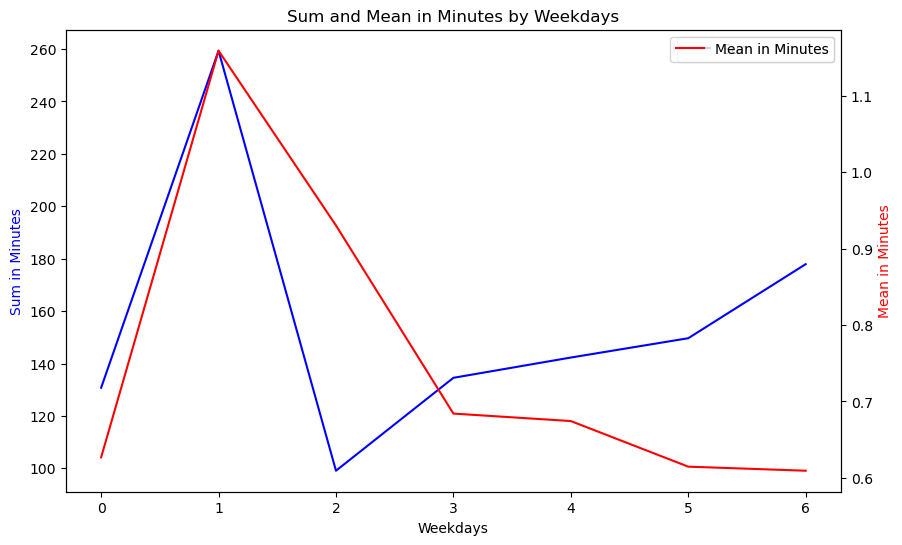

In [746]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.lineplot(data=dff_weekdays, x='weekdays', y='Sum_in_minutes', ax=ax1, color='b', label='Sum in Minutes')
ax1.set_ylabel('Sum in Minutes', color='b')
ax1.set_xlabel('Weekdays')


ax2 = ax1.twinx()
sns.lineplot(data=dff_weekdays, x='weekdays', y='Mean_in_minutes', ax=ax2, color='r', label='Mean in Minutes')
ax2.set_ylabel('Mean in Minutes', color='r')

plt.title('Sum and Mean in Minutes by Weekdays')
plt.show()


Mondays seems to be the day when the company and empoyees both faced the maximum hangupduration in the month.

# Task 4: Order and Refund Analysis

# Question: 
12. Determine the order status distribution for calls.

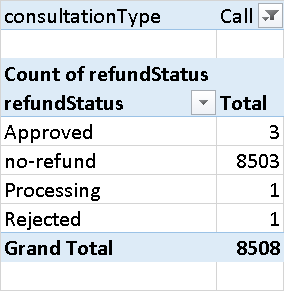!tal	8508
	


In [766]:
df.loc[df['consultationType'] == 'Call', 'refundStatus'].value_counts()

refundStatus
no-refund     8503
Approved         3
Rejected         1
Processing       1
Name: count, dtype: int64

Max was no-retuen

# Question:
13. Calculate the total refund amount and identify the refund status distribution.

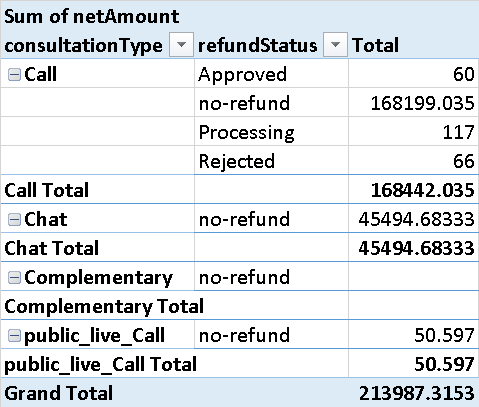!	213987.3153
	213987.3153


In [781]:
df.groupby(['consultationType','refundStatus',])[['netAmount']].sum()

netAmount
consultationType refundStatus               
Call             Approved          60.000000
                 Processing       117.000000
                 Rejected          66.000000
                 no-refund     168199.035000
Chat             no-refund      45494.683333
Complementary    no-refund          0.000000
public_live_Call no-refund         50.597000

only 60 is refunded!

# Task
# Question
14. Based on your analysis, provide insights into call center performance and any actionable
recommendations for improving call handling, user satisfaction, or earnings.

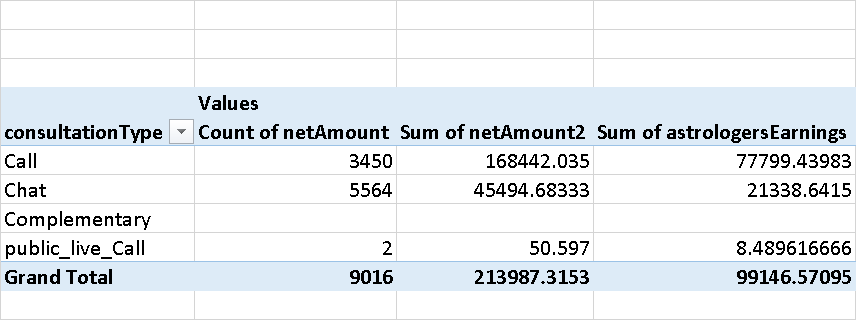!

As per the snapshot, dispite being lesser, Astrologers earned more from Call but in companies case it was just the opposite, thus astrologer must focus more on calls but as per companies perspective the opposite must be done.7095
			


# EDA2:

In [810]:
dff=df1[['createdAt', 'astrologersEarnings']]
dff

,createdAt,astrologersEarnings
0,2023-12-01 00:04:02.993000+00:00,NaN
1,2023-12-01 00:08:51.903000+00:00,NaN
2,2023-12-01 00:17:22.270000+00:00,NaN
3,2023-12-01 00:24:41.672000+00:00,NaN
4,2023-12-01 00:48:53.744000+00:00,NaN
...,...,...
28022,2024-01-03 23:36:02.872000+00:00,7.275
28023,2024-01-03 23:46:59.765000+00:00,NaN
28024,2024-01-03 23:48:13.271000+00:00,NaN
28025,2024-01-03 23:53:40.997000+00:00,NaN


In [815]:
dff['weekday']=dff['createdAt'].dt.weekday
dff

C:\Users\YOGA\AppData\Local\Temp\ipykernel_3224\3284147308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['weekday']=dff['createdAt'].dt.weekday


,createdAt,astrologersEarnings,weekday
0,2023-12-01 00:04:02.993000+00:00,NaN,4
1,2023-12-01 00:08:51.903000+00:00,NaN,4
2,2023-12-01 00:17:22.270000+00:00,NaN,4
3,2023-12-01 00:24:41.672000+00:00,NaN,4
4,2023-12-01 00:48:53.744000+00:00,NaN,4
...,...,...,...
28022,2024-01-03 23:36:02.872000+00:00,7.275,2
28023,2024-01-03 23:46:59.765000+00:00,NaN,2
28024,2024-01-03 23:48:13.271000+00:00,NaN,2
28025,2024-01-03 23:53:40.997000+00:00,NaN,2


In [833]:
dff.loc[
    (df['freeCall'] == 0) & 
    (df['freeChat'] == 0) & 
    (df['astrologersEarnings'].notnull()) & 
    (df['astrologersEarnings'] > 0)
].groupby('weekday')[''].mean()

weekday
0    46.195946
1    46.670032
2    51.441518
3    42.278230
4    50.321034
5    52.011781
6    51.981645
Name: astrologersEarnings, dtype: float64

In [843]:
dff.loc[(df['freeCall'] == 0) & (df['freeChat'] == 0) & (df['astrologersEarnings'].notnull()) & 
        (df['astrologersEarnings'] > 0)].groupby('weekday')['createdAt'].count()/df['gid'].nunique()

weekday
0    2.366412
1    2.351145
2    2.366412
3    2.053435
4    2.244275
5    2.122137
6    2.030534
Name: createdAt, dtype: float64

# Observation:
          1. Acoording to the the month, the customers per person is between 2-3 everyday in the week but some how the earning is comparitively more in the week end.